# Proiectare filtru Chebyshev

# Parametrii filtru prototip

| n   | i   | aᵢ     | bᵢ     | $kᵢ = f_{C_i}/f_{C}$ | Qᵢ   |
| --- | --- | ------ | ------ | -------------------- | ---- |
| 4   | 1   | 2.4025 | 4.9862 | 0.550                | 0.93 |
| 4   | 2   | 0.2374 | 1.1896 | 1.413                | 4.59 |



## Afișare filtru prototip

In [265]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
# from sympy import symbols, Poly, latex
import sympy as sp
import cmath #for complex numbers
import IPython.display as jupyter
import sys
sys.path.append(f"C:\\Users\\maurovlachus\\OneDrive - Technical University of Cluj-Napoca\\utcn\\master\\caa\\proiect\\p1_opamps\\ekvParameterExtraction\\ekvExtractionScripts")
from siUnits import *

In [266]:
num1_norm = [1]
den1_norm = [4.9862, 2.4025, 1]
num2_norm = [1]
den2_norm = [1.1896, 0.2374, 1]

In [267]:
# Create transfer function objects (using TransferFunction class)
tf1_norm = signal.TransferFunction(num1_norm, den1_norm)
tf2_norm = signal.TransferFunction(num2_norm, den2_norm)
# Cascade the transfer functions (multiply them)
tf_cascade_norm = signal.TransferFunction(np.polymul(tf1_norm.num, tf2_norm.num), np.polymul(tf1_norm.den, tf2_norm.den))

# Print the cascaded transfer function
print("Cascaded Transfer Function:")
print(tf_cascade_norm)

Cascaded Transfer Function:
TransferFunctionContinuous(
array([0.16858904]),
array([1.        , 0.68139273, 1.13732757, 0.44505822, 0.16858904]),
dt: None
)


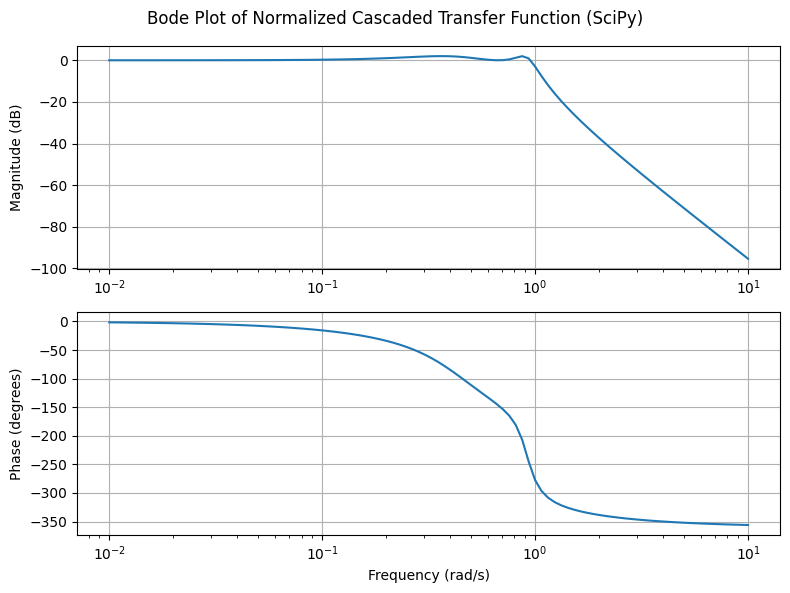

In [268]:
# Generate Bode plot data
w, mag, phase = signal.bode(tf_cascade_norm)

# Create the Bode plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot magnitude (in dB)
ax1.semilogx(w, mag)
ax1.set_ylabel("Magnitude (dB)")
ax1.grid(True)

# Plot phase (in degrees)
ax2.semilogx(w, phase)
ax2.set_ylabel("Phase (degrees)")
ax2.set_xlabel("Frequency (rad/s)")
ax2.grid(True)
fig.suptitle("Bode Plot of Normalized Cascaded Transfer Function (SciPy)")
plt.tight_layout()
plt.show()

## Calcul filtru real

In [269]:
# Cutoff frequency in Hz
cutoff_freq_hz = 16
# Convert to radians per second
cutoff_freq_rad = 2 * np.pi * cutoff_freq_hz

In [270]:
# Denormalization function
def denormalize_tf(num, den, cutoff_freq):
    """Denormalizes a transfer function, CORRECTLY adjusting numerator."""
    n = len(den) - 1  # Order of the system
    m = len(num) - 1 # Order of the numerator
    denormalized_den = den.copy()
    denormalized_num = num.copy()
    for i in range(0, n):
        denormalized_den[i] = den[i] / (cutoff_freq**(n-i))
    # for i in range(0, m + 1):
        # denormalized_num[i] = num[i] * (cutoff_freq**(n-i)) #Correct numerator scaling
    return denormalized_num, denormalized_den

In [271]:
# Denormalize the transfer functions
num1, den1 = denormalize_tf(num1_norm, den1_norm, cutoff_freq_rad)
print(f"TF1:")
print(num1)
print(den1)
num2, den2 = denormalize_tf(num2_norm, den2_norm, cutoff_freq_rad)
print(f"TF2:")
print(num2)
print(den2)
# Create denormalized transfer function objects
tf1 = signal.TransferFunction(num1, den1)
tf2 = signal.TransferFunction(num2, den2)
# Cascade the denormalized transfer functions
tf_cascade = signal.TransferFunction(np.polymul(tf1.num, tf2.num), np.polymul(tf1.den, tf2.den))

# Print the denormalized cascaded transfer function
print("Denormalized Cascaded Transfer Function:")
print(tf_cascade)

TF1:
[1]
[0.0004933668807396725, 0.02389810942364241, 1]
TF2:
[1]
[0.00011770671880949709, 0.002361461468125997, 1]
Denormalized Cascaded Transfer Function:
TransferFunctionContinuous(
array([17219825.81812658]),
array([1.00000000e+00, 6.85010685e+01, 1.14943726e+04, 4.52185237e+05,
       1.72198258e+07]),
dt: None
)


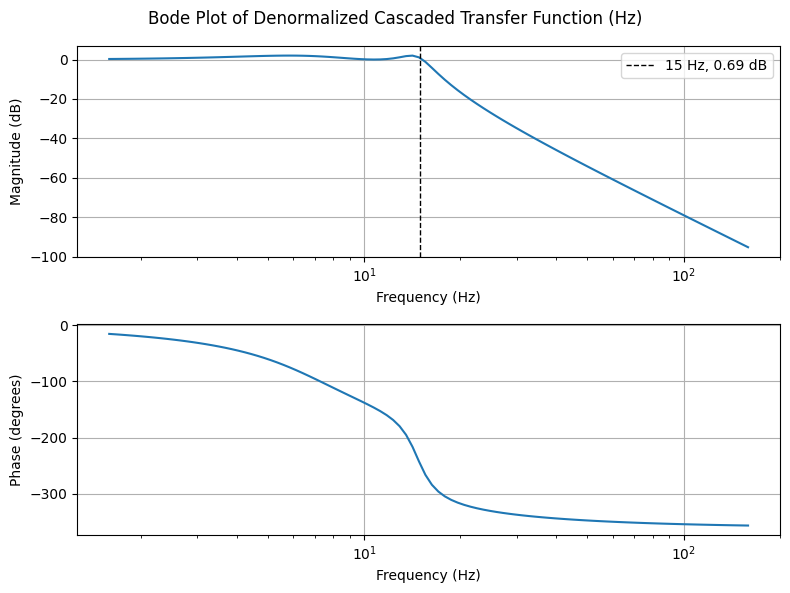

In [272]:
# Bode plot of the denormalized cascaded transfer function
w, mag, phase = signal.bode(tf_cascade)
#For plotting in Hz:
w_hz = w / (2*np.pi)

# Cutoff frequency in Hz
ergSignalMaxFreq = 15
# Convert to radians per second
ergSignalMaxFreq_rad = 2 * np.pi * ergSignalMaxFreq

#Example of checking the magnitude at the cutoff frequency:
cutoff_freq_check = ergSignalMaxFreq_rad
w_check, h = signal.freqresp(tf_cascade, w=[cutoff_freq_check])
mag_at_cutoff = 20*np.log10(np.abs(h[0]))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.semilogx(w_hz, mag)
ax1.set_ylabel("Magnitude (dB)")
ax1.set_xlabel("Frequency (Hz)")
ax1.grid(True)
# Add vertical line and label
ax1.axvline(ergSignalMaxFreq, color='k', linestyle='--', linewidth=1, label=f'{ergSignalMaxFreq} Hz, {mag_at_cutoff:.2f} dB')
ax1.legend() #show label

ax2.semilogx(w_hz, phase)
ax2.set_ylabel("Phase (degrees)")
ax2.set_xlabel("Frequency (Hz)")
ax2.grid(True)
fig.suptitle("Bode Plot of Denormalized Cascaded Transfer Function (Hz)")
plt.tight_layout()
plt.show()

In [273]:
#Example of checking the magnitude at the cutoff frequency:
cutoff_freq_check = cutoff_freq_rad
w_check, h = signal.freqresp(tf_cascade, w=[cutoff_freq_check])
mag_at_cutoff = 20*np.log10(np.abs(h[0]))
print(f"Magnitude at cutoff frequency ({cutoff_freq_hz} Hz): {mag_at_cutoff} dB")


Magnitude at cutoff frequency (16 Hz): -3.0092873551061246 dB


In [274]:
# Get the numerator and denominator polynomials as sympy Poly objects
s = sp.symbols('s')

# Access numerator and denominator correctly
num = np.array(tf_cascade.num).ravel()
print(num)
den = np.array(tf_cascade.den).ravel()
print(den)

num_poly = sp.Poly(num[::-1], s)  # Reverse coefficients for sympy
den_poly = sp.Poly(den[::-1], s)  # Reverse coefficients for sympy

# Generate LaTeX representation
num_latex = sp.latex(num_poly)
den_latex = sp.latex(den_poly)

tf_latex = r'\frac{' + num_latex + r'}{' + den_latex + r'}'

print("Resulting Transfer Function (LaTeX):")
# print(tf_latex)
jupyter.display(jupyter.Latex("$" + tf_latex + "$"))


[17219825.81812658]
[1.00000000e+00 6.85010685e+01 1.14943726e+04 4.52185237e+05
 1.72198258e+07]
Resulting Transfer Function (LaTeX):


<IPython.core.display.Latex object>

In [275]:
def extract_wp_qp(num, den):
    """Extracts omega_p (pole frequency) and Q_p (pole quality factor)."""

    if len(den) != 3:
        raise ValueError("Denominator must be a 2nd order polynomial (3 coefficients).")

    a2, a1, a0 = den  # Coefficients: a2*s^2 + a1*s + a0

    wp = 1/np.sqrt(a2) if a2 > 0 else cmath.sqrt(a2) #handle negative a0
    Qp = 1 / (wp*a1) if a1 != 0 else np.inf #handle a1 = 0

    return wp, Qp

In [276]:
def printBiquadTF(wp, Q):
    print(f"laplace = 1/(s**2*({1/(wp**2)}) + s*({1/(wp*Q)}) +1)")
    print(f"laplace = 1/(s**2*({num2SiStringRounded(1/(wp**2))}) + s*({num2SiStringRounded(1/(wp*Q))}) +1)")

In [277]:
wp1, Qp1 = extract_wp_qp(num1, den1)
print(f"TF1: ω_p = {wp1:.4f}, Q_p = {Qp1:.4f}")

wp2, Qp2 = extract_wp_qp(num2, den2)
print(f"TF2: ω_p = {wp2:.4f}, Q_p = {Qp2:.4f}")

printBiquadTF(wp1, Qp1)
printBiquadTF(wp2, Qp2)
# print(f"1/s**2*({1/(wp1**2)}) + s*({1/(wp1*Qp1)}) +1")
# print(f"1/s**2*({1/(wp2**2)}) + s*({1/(wp2*Qp2)}) +1")
# print(f"1/s**2*({1/(wp1**2)}) + s*({1/(wp1*Qp1)}) +1")
# print(f"1/s**2*({1/(wp2**2)}) + s*({1/(wp2*Qp2)}) +1")

TF1: ω_p = 45.0210, Q_p = 0.9294
TF2: ω_p = 92.1721, Q_p = 4.5943
laplace = 1/(s**2*(0.0004933668807396725) + s*(0.02389810942364241) +1)
laplace = 1/(s**2*(493.367u) + s*(23.898m) +1)
laplace = 1/(s**2*(0.00011770671880949706) + s*(0.002361461468125997) +1)
laplace = 1/(s**2*(117.707u) + s*(2.361m) +1)
